In [ ]:
from google.colab import drive
drive.mount('/content/drive/') 

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/signal/dataset

/content/drive/MyDrive/signal/dataset


In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
# ! cp /content/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download sartajbhuvaji/brain-tumor-classification-mri

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 166, in authenticate
    self.config_file, self.config_dir))
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
! unzip /content/drive/MyDrive/dataset/brain-tumor-classification-mri.zip

Archive:  /content/drive/MyDrive/dataset/brain-tumor-classification-mri.zip
replace Testing/glioma_tumor/image(1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(1).jpg  
replace Testing/glioma_tumor/image(10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(10).jpg  
replace Testing/glioma_tumor/image(100).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(100).jpg  
replace Testing/glioma_tumor/image(11).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(11).jpg  
replace Testing/glioma_tumor/image(12).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(12).jpg  
replace Testing/glioma_tumor/image(13).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/image(13).jpg  
replace Testing/glioma_tumor/image(14).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Testing/glioma_tumor/im

In [ ]:
pip install mplot3d-dragger

In [ ]:
pip install mpl-toolkits.clifford

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
     |████████████████████████████████| 159 kB 5.0 MB/s 
     |████████████████████████████████| 642 kB 58.1 MB/s 
     |████████████████████████████████| 77 kB 6.6 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard, ModelCheckpoint
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [ ]:
labels = ['glioma_tumor','no_tumor','meningioma_tumor','pituitary_tumor']

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 224
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset','Training',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('/content/drive/MyDrive/dataset','Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|██████████| 74/74 [00:00<00:00, 86.49it/s]


In [ ]:
print("X Train Shape:", X_train.shape)
print("y Train Shape:", y_train.shape)
print("X Test Shape:", X_test.shape)
print("y Test Shape:", y_test.shape)

X Train Shape: (2870, 224, 224, 3)
y Train Shape: (2870,)
X Test Shape: (394, 224, 224, 3)
y Test Shape: (394,)


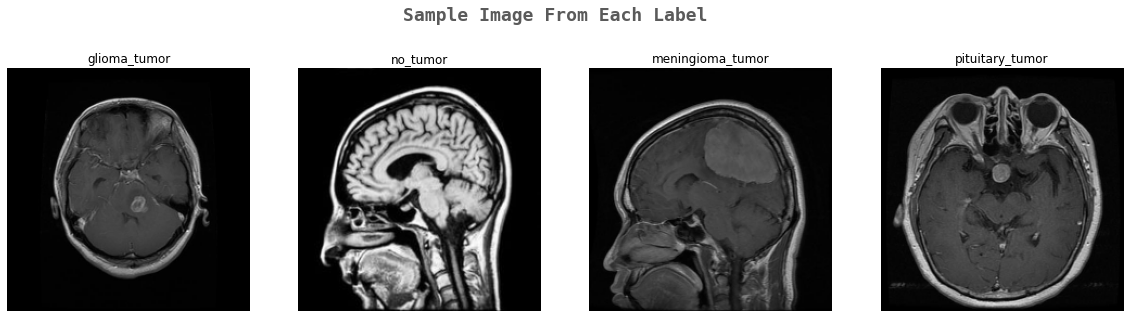

In [ ]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',color='#313131',y=0.62,x=0.4,alpha=0.8)
for i in labels:
    j=0
    while True :
        if y_train[j]==i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

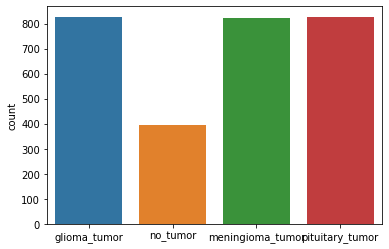

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

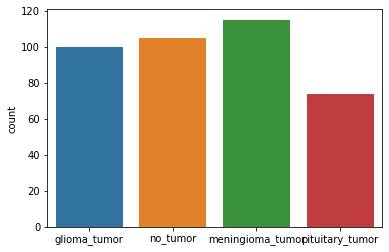

In [ ]:
sns.countplot(y_test)

In [ ]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

# ResNet 50

In [ ]:
from tensorflow.keras.applications import ResNet50
Resnet_50 = ResNet50(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))
model = Resnet_50.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=Resnet_50.input, outputs = model)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
81/81 [==============================] - 24s 192ms/step - loss: 0.6263 - accuracy: 0.7906 - val_loss: 50.4082 - val_accuracy: 0.0035
Epoch 2/10
81/81 [==============================] - 14s 170ms/step - loss: 0.2980 - accuracy: 0.8916 - val_loss: 5.4980 - val_accuracy: 0.1847
Epoch 3/10
81/81 [==============================] - 14s 170ms/step - loss: 0.1674 - accuracy: 0.9458 - val_loss: 0.3700 - val_accuracy: 0.8955
Epoch 4/10
81/81 [==============================] - 14s 170ms/step - loss: 0.1009 - accuracy: 0.9624 - val_loss: 5.0012 - val_accuracy: 0.1289
Epoch 5/10
81/81 [==============================] - 14s 170ms/step - loss: 0.0980 - accuracy: 0.9702 - val_loss: 0.0906 - val_accuracy: 0.9582
Epoch 6/10
81/81 [==============================] - 14s 170ms/step - loss: 0.0458 - accuracy: 0.9834 - val_loss: 2.2867 - val_accuracy: 0.3693
Epoch 7/10
81/81 [==============================] - 14s 170ms/step - loss: 0.1318 - accuracy: 0.9582 - val_loss: 4.0057 - val_accuracy: 0.313

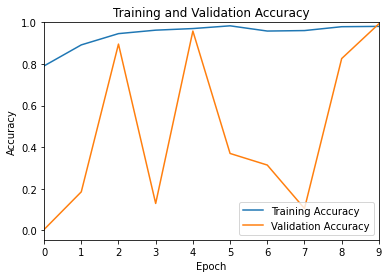

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0, 0.5, 'Training & Validation Loss')

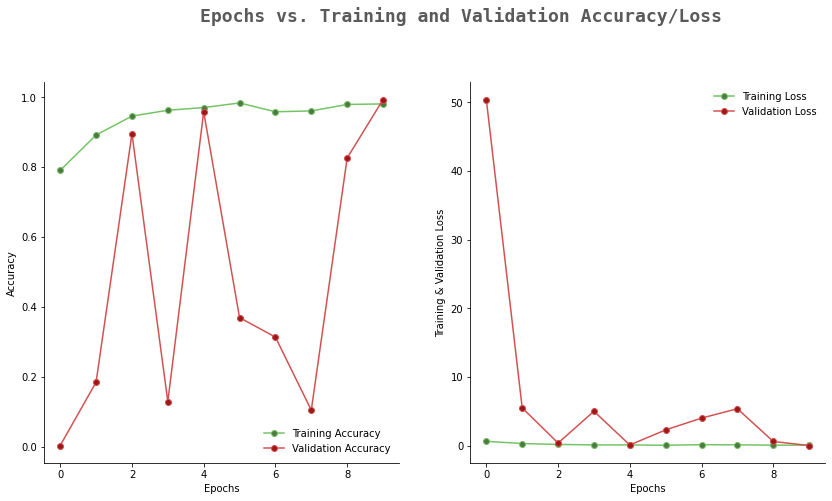

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color='#313131',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.85      0.11      0.19       100
           1       0.78      0.93      0.85       105
           2       0.74      0.88      0.80       115
           3       0.60      0.96      0.74        74

    accuracy                           0.71       394
   macro avg       0.74      0.72      0.65       394
weighted avg       0.75      0.71      0.65       394



# VGG16

In [ ]:
from tensorflow.keras.applications import VGG16
VGG_16 = VGG16(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = VGG_16.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=VGG_16.input, outputs = model)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
history = model.fit(X_train,y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
81/81 [==============================] - 24s 252ms/step - loss: 1.9827 - accuracy: 0.3244 - val_loss: 1.2664 - val_accuracy: 0.7526
Epoch 2/10
81/81 [==============================] - 18s 224ms/step - loss: 1.1365 - accuracy: 0.4410 - val_loss: 1.3945 - val_accuracy: 0.4774
Epoch 3/10
81/81 [==============================] - 18s 223ms/step - loss: 1.0898 - accuracy: 0.5010 - val_loss: 1.4411 - val_accuracy: 0.1080
Epoch 4/10
81/81 [==============================] - 18s 223ms/step - loss: 1.0703 - accuracy: 0.5130 - val_loss: 1.2248 - val_accuracy: 0.4216
Epoch 5/10
81/81 [==============================] - 18s 222ms/step - loss: 0.9619 - accuracy: 0.5827 - val_loss: 1.0814 - val_accuracy: 0.7213
Epoch 6/10
81/81 [==============================] - 18s 223ms/step - loss: 0.8830 - accuracy: 0.6194 - val_loss: 1.0813 - val_accuracy: 0.6655
Epoch 7/10
81/81 [==============================] - 18s 224ms/step - loss: 0.7359 - accuracy: 0.6938 - val_loss: 1.5708 - val_accuracy: 0.5470

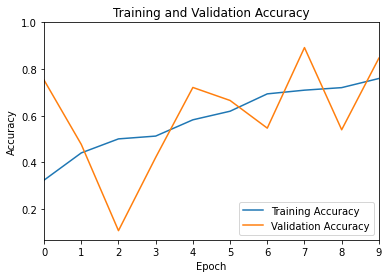

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0, 0.5, 'Training & Validation Loss')

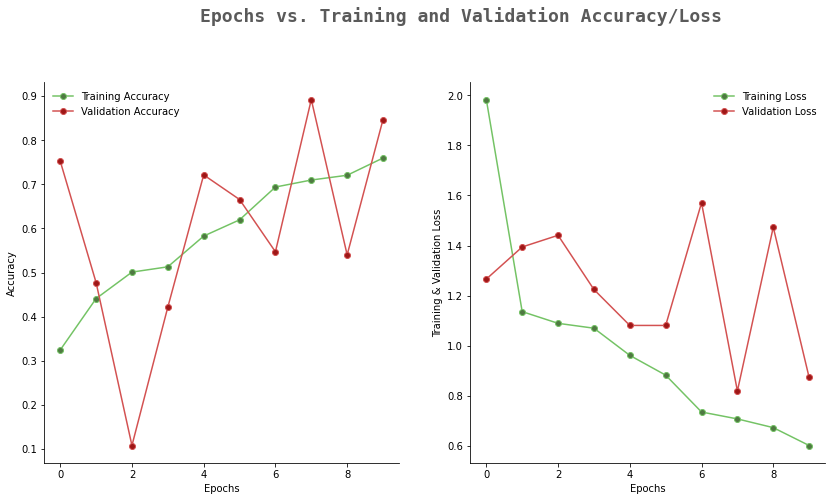

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color='#313131',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       0.81      0.13      0.22       100
           1       0.32      0.91      0.47       105
           2       0.19      0.04      0.07       115
           3       0.40      0.27      0.32        74

    accuracy                           0.34       394
   macro avg       0.43      0.34      0.27       394
weighted avg       0.42      0.34      0.26       394



# DenseNet 169

In [ ]:
from tensorflow.keras.applications import DenseNet169
DenseNet_169 = DenseNet169(weights='imagenet',include_top=False,input_shape=(image_size,image_size,3))

model = DenseNet_169.output
model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.4)(model)
model = tf.keras.layers.Dense(4,activation='softmax')(model)
model = tf.keras.models.Model(inputs=DenseNet_169.input, outputs = model)
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_10[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                           

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer = 'Adam', metrics= ['accuracy'])
history = model.fit(X_train,y_train,validation_split=0.1, epochs =10, verbose=1, batch_size=32)

Epoch 1/10
81/81 [==============================] - 47s 315ms/step - loss: 0.5345 - accuracy: 0.8041 - val_loss: 117.8374 - val_accuracy: 0.0000e+00
Epoch 2/10
81/81 [==============================] - 19s 239ms/step - loss: 0.2640 - accuracy: 0.9048 - val_loss: 0.1363 - val_accuracy: 0.9617
Epoch 3/10
81/81 [==============================] - 19s 238ms/step - loss: 0.2241 - accuracy: 0.9164 - val_loss: 20.4705 - val_accuracy: 0.0000e+00
Epoch 4/10
81/81 [==============================] - 19s 238ms/step - loss: 0.1778 - accuracy: 0.9369 - val_loss: 3.3854 - val_accuracy: 0.2160
Epoch 5/10
81/81 [==============================] - 19s 241ms/step - loss: 0.1226 - accuracy: 0.9578 - val_loss: 6.2404 - val_accuracy: 0.0418
Epoch 6/10
81/81 [==============================] - 19s 237ms/step - loss: 0.1145 - accuracy: 0.9613 - val_loss: 4.3327 - val_accuracy: 0.3101
Epoch 7/10
81/81 [==============================] - 19s 238ms/step - loss: 0.0660 - accuracy: 0.9787 - val_loss: 0.5943 - val_accur

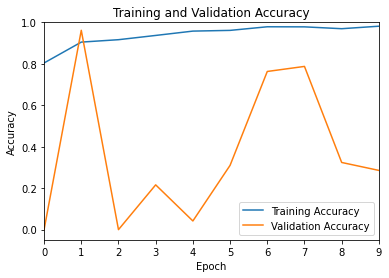

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.xlim([0,9])
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.show()

Text(0, 0.5, 'Training & Validation Loss')

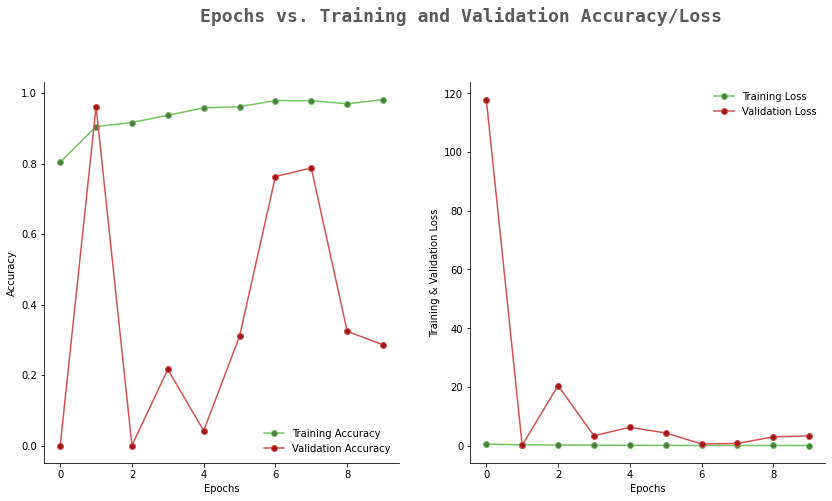

In [ ]:
filterwarnings('ignore')

epochs = [i for i in range(10)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color='#313131',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor='#4F7942',color='#74C365',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor='#9E1717',color='#D35151',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')


In [ ]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)
print(classification_report(y_test_new,pred))

              precision    recall  f1-score   support

           0       1.00      0.08      0.15       100
           1       0.48      1.00      0.65       105
           2       0.69      0.90      0.78       115
           3       1.00      0.23      0.37        74

    accuracy                           0.59       394
   macro avg       0.79      0.55      0.49       394
weighted avg       0.77      0.59      0.51       394

